In [1]:
## setup environment
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
font = {'size' : 18}
plt.rc('font', **font)

import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot

This is a dataset acquired by Mickael Mouille

Questions:  
Does fundraising amount affect success? Are fundraisers accurately estimating how much money they need to successfully complete a project?   
Which project categories are most successful?  
Does fundraising duration affect success?

In [2]:
## load the data
projects = pd.read_csv('../data/ks-projects-201801.csv')

# visualize some of the data
projects.head(n=10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [3]:
## add/remove columns from dataframe
# remove the 'usd pledged' column because the numbers look incorrect
projects.drop(columns='usd pledged');

# calculate the ratio between fundraised amount and goal amount
projects['pledge_goal_ratio'] = projects['usd_pledged_real']/projects['usd_goal_real']

# calculate the fundraising duration
projects['fundraising_duration'] = (pd.to_datetime(projects['deadline']) - pd.to_datetime(projects['launched'])).dt.days

In [4]:
# focus our initial analysis on successful projects
isSuccessful = projects['state'] == 'successful'
projectsSuccessful = projects[isSuccessful]

print('Min ratio: %0.2f' % projectsSuccessful['pledge_goal_ratio'].min())
print('Max ratio: %0.2f' % projectsSuccessful['pledge_goal_ratio'].max())
print('Median ratio: %0.2f' % projectsSuccessful['pledge_goal_ratio'].median())
projectsSuccessful.head()

Min ratio: 0.85
Max ratio: 104277.89
Median ratio: 1.17


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge_goal_ratio,fundraising_duration
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.00,52375.00,50000.00,1.047500,34
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.00,1205.00,1000.00,1.205000,19
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,successful,100,US,12700.00,12700.00,12500.00,1.016000,29
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,successful,761,GB,57763.78,121857.33,6469.73,18.834995,27
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.0,successful,7,US,250.00,250.00,250.00,1.000000,14


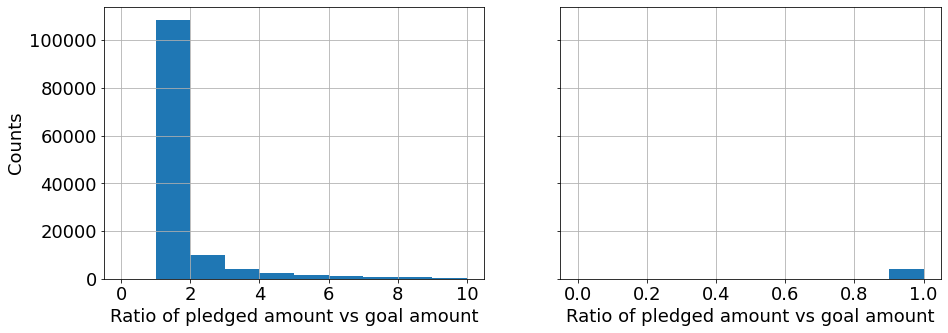

In [5]:
fig, axes = plt.subplots(1, 2, sharey='row', figsize=(15,5))

axes[0].hist(projectsSuccessful['pledge_goal_ratio'], range=(0,10))
axes[0].grid('on')
axes[0].set(ylabel='Counts')
axes[0].set(xlabel='Ratio of pledged amount vs goal amount')
axes[0].set_xticks(np.arange(0, 11, 2))

axes[1].hist(projectsSuccessful['pledge_goal_ratio'], range=(0,1))
axes[1].grid('on')
axes[1].set(xlabel='Ratio of pledged amount vs goal amount')
axes[1].set_xticks(np.arange(0, 1.1, 0.2))

plt.show()

# almost all successful projects had achieved their fundraising goal

In [6]:
hasReachedFundraisingGoal = projects['pledge_goal_ratio'] >= 1.0
tmp1 = projects[hasReachedFundraisingGoal]
tmp2 = tmp1.groupby(['state']).nunique()
tmp2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge_goal_ratio,fundraising_duration
state,,,,,,,,,,,,,,,,
canceled,698,696,101,14,11,577,130,698,621,291,17,635,655,305,620,60
failed,6,6,6,5,1,6,6,6,6,6,1,6,6,6,5,5
live,441,441,92,15,13,46,107,441,433,256,20,396,438,211,424,47
successful,133951,133557,159,15,14,3067,3514,133880,53194,3908,23,64631,69960,20354,78623,92
suspended,292,292,63,14,12,270,80,292,284,204,16,286,288,164,281,46


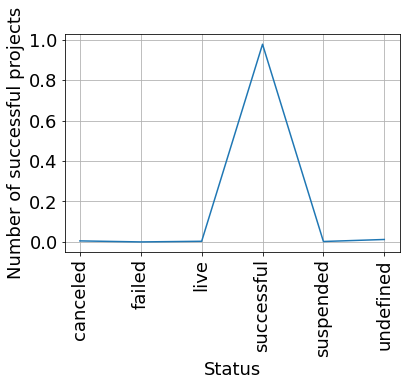

In [7]:
plt.plot(tmp2['ID']/len(tmp1))
plt.xticks(np.arange(0, len(tmp2)), tmp2.index, rotation='vertical')
plt.grid('on')
plt.ylabel('Number of successful projects')
plt.xlabel('Status')
plt.show()

# a vast majority of projects will be successful after reaching their fundraising goal. it is likely that project managers are correctly estimating how much money they need

In [8]:
lala1 = projects['pledge_goal_ratio'].between(0.8, 1.0, inclusive=False)
lala2 = projects[lala1]
lala3 = lala2.groupby(['state']).nunique()
lala3.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge_goal_ratio,fundraising_duration
state,,,,,,,,,,,,,,,,
canceled,283,283,56,15,10,270,83,283,279,174,17,278,282,146,275,41
failed,786,786,100,15,13,638,175,786,761,276,19,752,774,363,716,58
live,55,55,39,12,9,24,34,55,55,43,12,53,55,45,54,16
successful,5,5,4,3,2,5,5,5,5,5,2,5,5,5,5,5
suspended,40,40,22,10,5,40,32,40,40,38,5,40,40,35,40,16


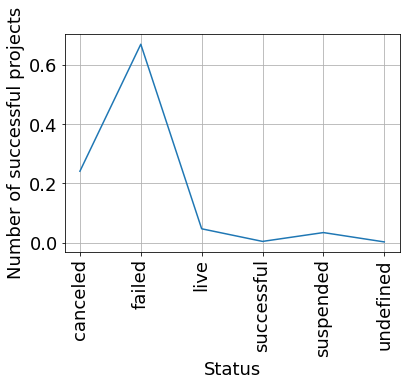

In [9]:
plt.plot(lala3['ID']/len(lala2))
plt.xticks(np.arange(0, len(lala3)), lala3.index, rotation='vertical')
plt.grid('on')
plt.ylabel('Number of successful projects')
plt.xlabel('Status')
plt.show()

# even reaching 0.8x the fundraising amount can be tied to failure

In [10]:
tmp1 = projects.copy()

bins = np.arange(0,10,0.1)
tmp1['lala'] = np.digitize(projects['pledge_goal_ratio'], bins)*0.1-0.1
tmp1.tail()

tmp2 = tmp1.groupby(['state','lala']).count().unstack(fill_value=0).stack()
tmp2

ID   name  category  main_category  currency  deadline  \
state     lala                                                              
canceled  0.0   29462  29462     29462          29462     29462     29462   
          0.1    3538   3538      3538           3538      3538      3538   
          0.2    1884   1884      1884           1884      1884      1884   
          0.3    1124   1124      1124           1124      1124      1124   
          0.4     713    713       713            713       713       713   
...               ...    ...       ...            ...       ...       ...   
undefined 9.5       0      0         0              0         0         0   
          9.6       0      0         0              0         0         0   
          9.7       0      0         0              0         0         0   
          9.8       0      0         0              0         0         0   
          9.9       0      0         0              0         0         0   

                 goal  launched  pledged  backers  country  usd pledged  \
state     lala                                                            
canceled  0.0   29462     29462    29462    29462    29462        29444   
          0.1    3538      3538     3538     3538     3538         3537   
          0.2    1884      1884     1884     1884     1884         1884   
          0.3    1124      1124     1124     1124     1124         1124   
          0.4     713       713      713      713      713          713   
...               ...       ...      ...      ...      ...          ...   
undefined 9.5       0         0        0        0        0            0   
          9.6       0         0        0        0        0            0   
          9.7       0         0        0        0        0            0   
          9.8       0         0        0        0        0            0   
          9.9       0         0        0        0        0            0   

                usd_pledged_real  usd_goal_real  pledge_goal_ratio  \
state     lala                                                       
canceled  0.0              29462          29462              29462   
          0.1               3538           3538               3538   
          0.2               1884           1884               1884   
          0.3               1124           1124               1124   
          0.4                713            713                713   
...                          ...            ...                ...   
undefined 9.5                  0              0                  0   
          9.6                  0              0                  0   
          9.7                  0              0                  0   
          9.8                  0              0                  0   
          9.9                  0              0                  0   

                fundraising_duration  
state     lala                        
canceled  0.0                  29462  
          0.1                   3538  
          0.2                   1884  
          0.3                   1124  
          0.4                    713  
...                              ...  
undefined 9.5                      0  
          9.6                      0  
          9.7                      0  
          9.8                      0  
          9.9                      0  

[600 rows x 16 columns]

In [11]:
tmp3 = tmp1.groupby(['lala']).count()
tmp3

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge_goal_ratio,fundraising_duration
lala,,,,,,,,,,,,,,,,,
0.0,178012,178008,178012,178012,178012,178012,178012,178012,178012,178012,178012,178012,176280,178012,178012,178012,178012
0.1,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25633,25460,25633,25633,25633,25633
0.2,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14610,14541,14610,14610,14610,14610
0.3,9004,9004,9004,9004,9004,9004,9004,9004,9004,9004,9004,9004,8974,9004,9004,9004,9004
0.4,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5707,5723,5723,5723,5723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.5,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
9.6,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
9.7,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50


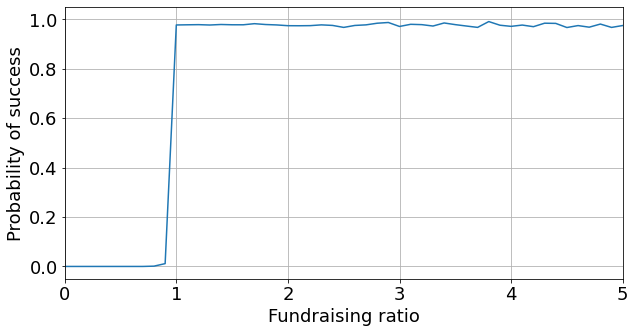

In [12]:
fig = plt.figure(figsize=(10,5))
plt.plot(tmp2['ID'].loc[('successful')]/tmp3['ID'])
plt.xlim((0,5))
plt.grid('on')
plt.ylabel('Probability of success')
plt.xlabel('Fundraising ratio')
plt.show()

In [13]:
numProjectsPerCategory = projects.groupby(['main_category']).nunique()

numSuccessfulProjectsPerCategory = projectsSuccessful.groupby(['main_category']).nunique()
numSuccessfulProjectsPerCategory.head()

,ID,name,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge_goal_ratio,fundraising_duration
main_category,,,,,,,,,,,,,,,,
Art,11510,11496,13,13,2716,742,11509,6966,1,645,20,7607,8119,2578,8121,91
Comics,5842,5841,6,13,2146,507,5842,4847,1,915,20,4840,5161,1433,5182,79
Crafts,2115,2113,15,13,1272,250,2115,1760,1,357,20,1757,1881,689,1819,64
Dance,2338,2337,5,11,1513,245,2338,1859,1,243,17,1870,1943,473,1781,73
Design,10550,10548,7,13,2328,635,10548,9475,1,2025,22,9488,9964,3214,9809,76


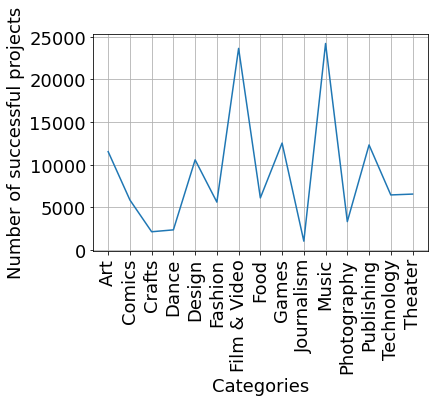

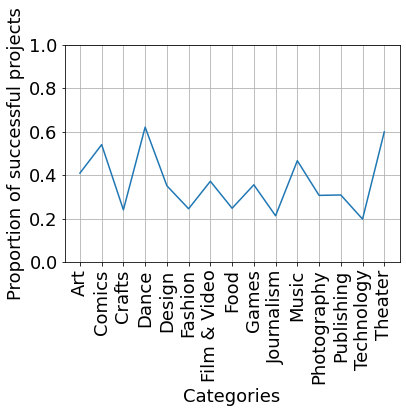

In [14]:
plt.plot(numSuccessfulProjectsPerCategory['ID'])
plt.xticks(np.arange(0, len(numSuccessfulProjectsPerCategory)), numSuccessfulProjectsPerCategory.index, rotation='vertical')
plt.grid('on')
plt.ylabel('Number of successful projects')
plt.xlabel('Categories')
plt.show()


plt.plot(numSuccessfulProjectsPerCategory['ID']/numProjectsPerCategory['ID'])
plt.xticks(np.arange(0, len(numSuccessfulProjectsPerCategory)), numSuccessfulProjectsPerCategory.index, rotation='vertical')
plt.grid('on')
plt.ylim((0,1))
plt.ylabel('Proportion of successful projects')
plt.xlabel('Categories')
plt.show()

# Although 'Film & Video' and 'Music' categories had the most successful projects, the proportion of successful projects is low. 
# Comics, Dance, and Theater are the most successful - there is more than 50% chance they succeed if they hit their fundraising goal

As a potential backer, when should you pledge money?  
How many projects successfully raised money but failed?

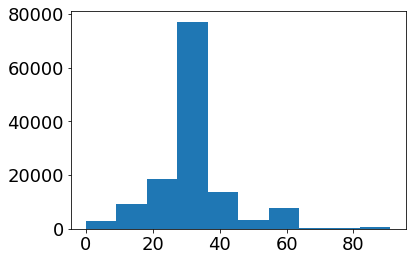

In [15]:
plt.hist(projectsSuccessful['fundraising_duration'])
plt.show()

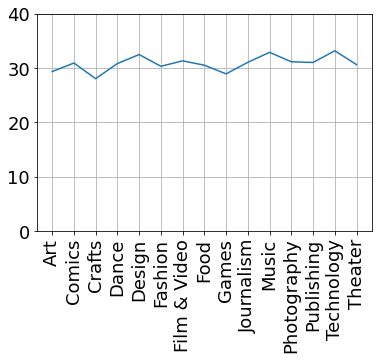

In [16]:
tmp1 = projectsSuccessful.groupby('main_category').mean()
tmp1.head()

plt.plot(tmp1['fundraising_duration'])
plt.grid('on')
plt.ylim((0,40))
plt.xticks(rotation='vertical')
plt.show()

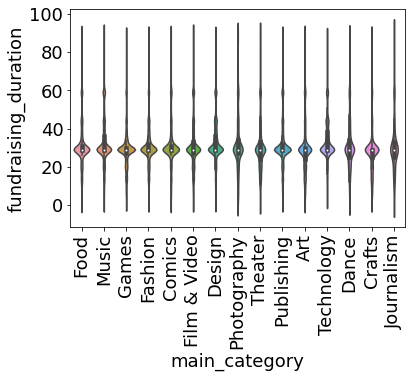

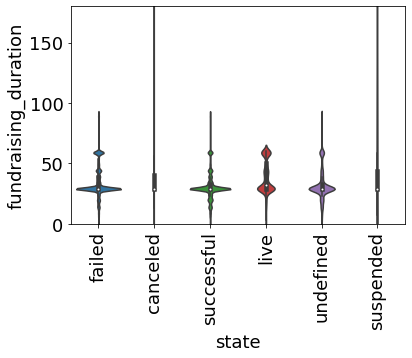

In [17]:
sns.violinplot(x='main_category', y='fundraising_duration', data=projectsSuccessful)
plt.xticks(rotation='vertical')
plt.show()

sns.violinplot(x='state', y='fundraising_duration', data=projects)
plt.xticks(rotation='vertical')
plt.ylim((0,30*6))
plt.show()

# fundraising duration doesn't seem to have a large effect on success
# can do a z test to see if the mean fundraising duration is statistically different

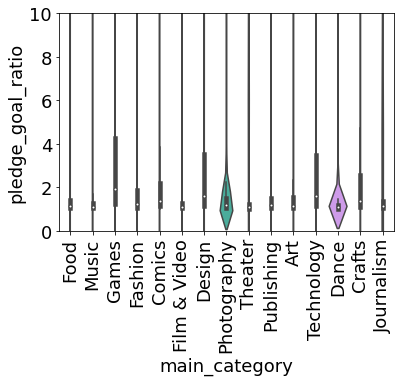

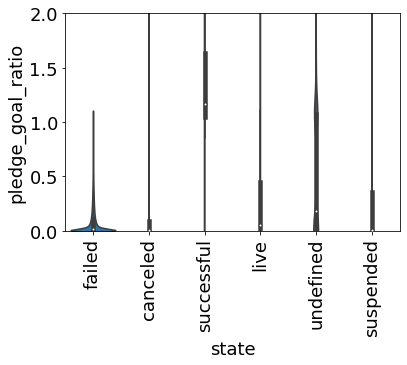

In [18]:
sns.violinplot(x='main_category', y='pledge_goal_ratio', data=projectsSuccessful)
plt.ylim((0,10))
plt.xticks(rotation='vertical')
plt.show()

sns.violinplot(x='state', y='pledge_goal_ratio', data=projects, scale='area')
plt.ylim((0,2))
plt.xticks(rotation='vertical')
plt.show()